In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Bias-Variance Tradeoff Lab

In this lab, we will use synthetic data to explore the concept of **bias** and **variance** in machine learning models. We'll demonstrate how simple and complex models behave and how this impacts model performance.

## Objectives
- Understand high bias (underfitting)
- Understand high variance (overfitting)
- Explore a balanced model with a good bias-variance tradeoff

In [ ]:
# Generate synthetic data
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 4 * np.pi)  # X values from 0 to 4π
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # sine wave + noise

## Dataset Overview
The dataset is based on a sine function with added Gaussian noise. This simulates real-world data that often contains noise.

In [ ]:
# Helper function to visualize models
def plot_model(model, X, y, label):
    X_test = np.linspace(0, 4*np.pi, 100).reshape(-1, 1)
    y_pred = model.predict(X_test)

    plt.scatter(X, y, color="black", label="Data")
    plt.plot(X_test, y_pred, label=label, linewidth=2)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.title(label)
    plt.show()

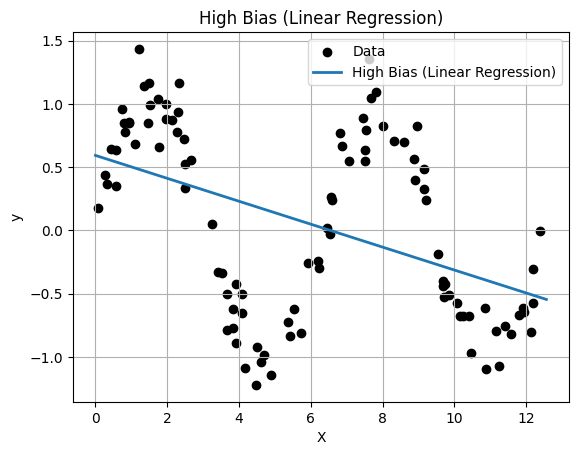

In [ ]:
# High Bias model
model_bias = LinearRegression()
model_bias.fit(X, y)
plot_model(model_bias, X, y, "High Bias (Linear Regression)")

## High Bias (Underfitting)

A simple linear regression model does not capture the complexity of the data, resulting in poor performance both on training and test sets.

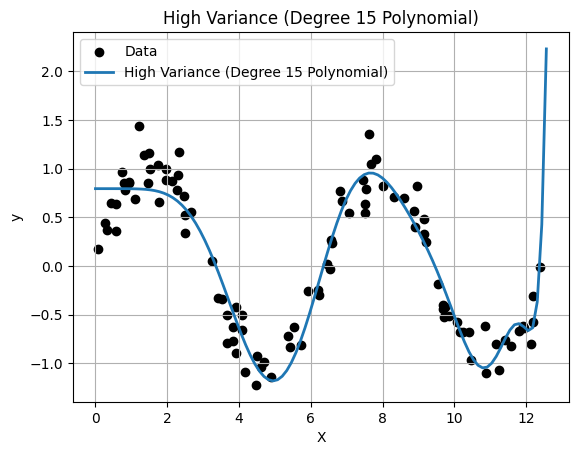

In [ ]:
# High Variance model
model_variance = make_pipeline(PolynomialFeatures(15), LinearRegression())
model_variance.fit(X, y)
plot_model(model_variance, X, y, "High Variance (Degree 15 Polynomial)")

## High Variance (Overfitting)

A very complex model fits the training data almost perfectly but fails to generalize well to unseen data.

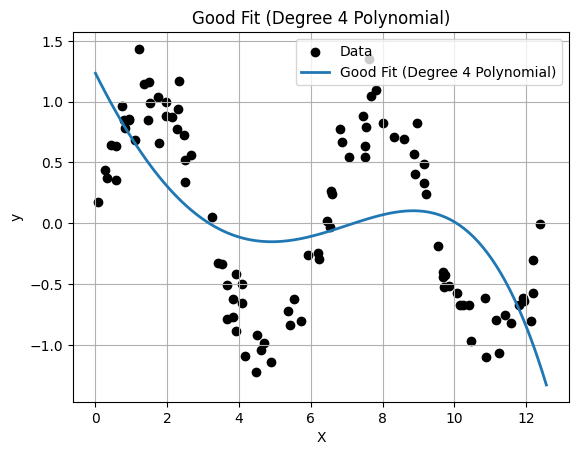

In [ ]:
# Just Right model
model_just_right = make_pipeline(PolynomialFeatures(4), LinearRegression())
model_just_right.fit(X, y)
plot_model(model_just_right, X, y, "Good Fit (Degree 4 Polynomial)")

## Balanced Model (Good Fit)

A model with just the right complexity captures the underlying pattern and generalizes well, balancing bias and variance.